# Part 2.2 

Tested SimpleNN on MNIST from torce 

In [1]:
import torch 
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import numpy as np

## Using Simple Neural Network (CNN) with an additional Layer & Cross Entropy Loss

### Optimzer using Adam

In [2]:
class DeepNN(nn.Module):
    def __init__(self):
        super(DeepNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)  # Add one more layer with 32 neurons
        self.fc4 = nn.Linear(32, 10)  # Output layer

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))  # Apply ReLU activation to the new layer
        x = self.fc4(x)
        return x

# Initialize the model
deep_snn_model = DeepNN()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(deep_snn_model.parameters(), lr=0.001)

# Part 2.3
Do write a lot of code snippets to make sure that things are correct.

Leave them here so that we could see that you have tried



In [3]:
import os
import glob

test_directory = "MNIST Dataset JPG format\\MNIST - JPG - testing"
training_directory = "MNIST Dataset JPG format\\MNIST - JPG - training"

# print(os.getcwd()) # For testing purposes 

full_test_directory = os.path.join(os.getcwd(), test_directory)

full_train_directory = os.path.join(os.getcwd(), training_directory)

subfolders = [f.path for f in os.scandir(full_train_directory) if f.is_dir()]
image_paths = [] # Stores the image paths 

for subfolder in subfolders:
    image_pattern = os.path.join(subfolder, '*.jpg')  # Pattern Matching to get all the JPEG
    image_paths.extend(glob.glob(image_pattern)) # Glob to get all images 

Epoch 1/10, Average Loss: 0.43894689186994457
Epoch 2/10, Average Loss: 0.19901527136937577
Epoch 3/10, Average Loss: 0.14471221605994936
Epoch 4/10, Average Loss: 0.11723488246771827
Epoch 5/10, Average Loss: 0.10042053568405288
Epoch 6/10, Average Loss: 0.08732874134926796
Epoch 7/10, Average Loss: 0.07816888710934677
Epoch 8/10, Average Loss: 0.0705132435529189
Epoch 9/10, Average Loss: 0.06529178037923743
Epoch 10/10, Average Loss: 0.06041725709645161


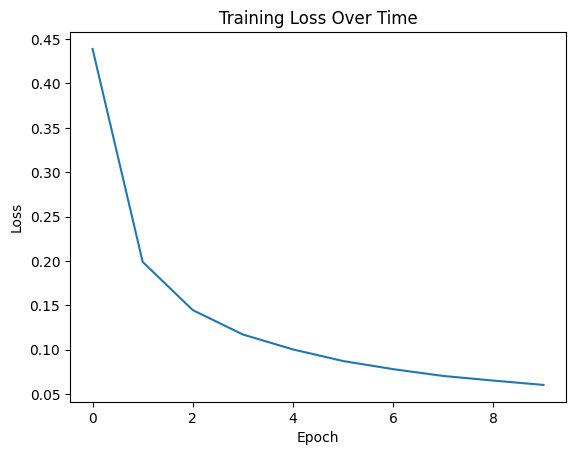

In [4]:
from torch.utils.data import Dataset
from PIL import Image

deep_snn_model.to(torch.device('cpu'))

losses_over_time = []

class CustomDataset(Dataset): # Since I want to use DataLoader to load batches of images 
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths) # Number of data points 

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('L')  # Convert to grayscale
        label = int(os.path.basename(os.path.dirname(img_path)))  # Extract label from the folder name

        if self.transform:
            image = self.transform(image)

        return image, label

# Data loading and preprocessing
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

custom_dataset = CustomDataset(image_paths, transform)
batch_size = 64
custom_dataloader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=True)

# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    for batch_idx, (data, target) in enumerate(custom_dataloader):
        optimizer.zero_grad()
        output = deep_snn_model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

    average_loss = running_loss / len(custom_dataloader)

    losses_over_time.append(average_loss) # Append the average loss to the list
    
    print(f'Epoch {epoch+1}/{num_epochs}, Average Loss: {average_loss}')

plt.plot(losses_over_time)
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## Testing of the Model with the Test Images

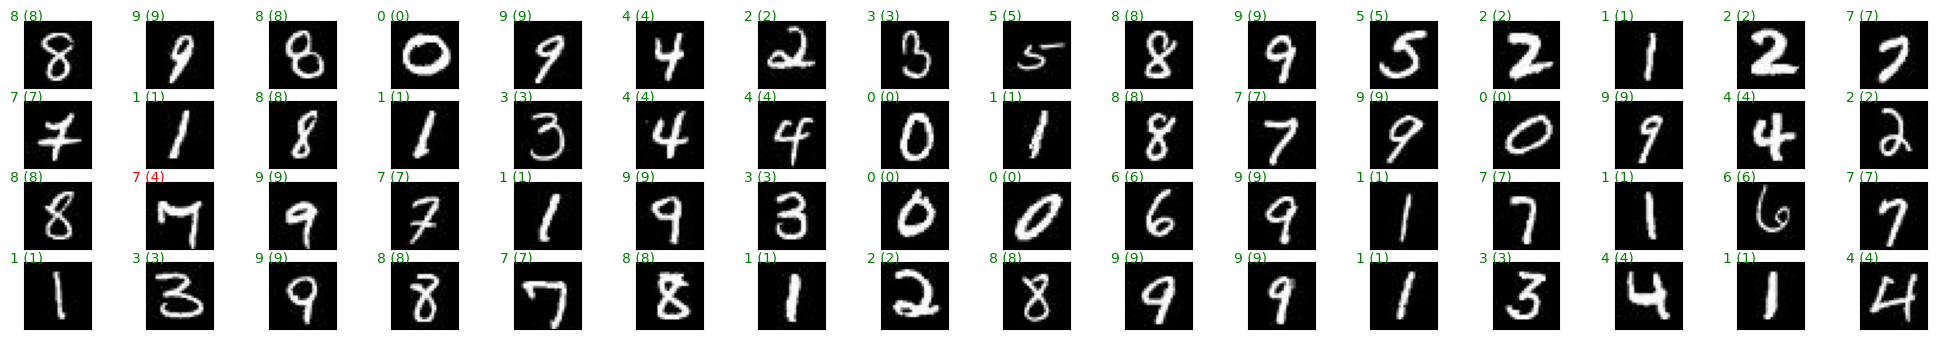

In [8]:
subfolders = [f.path for f in os.scandir(full_test_directory) if f.is_dir()]
image_paths2 = [] # Stores the image paths 

for subfolder in subfolders:
    image_pattern = os.path.join(subfolder, '*.jpg')  # Pattern Matching to get all the JPEG
    image_paths2.extend(glob.glob(image_pattern)) # Glob to get all images 

# Create the CustomDataset for testing
custom_dataset = CustomDataset(image_paths2, transform)
batch_size = 64
custom_dataloader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=True)

# Test the model and visualize predictions
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a batch of test data
dataiter = iter(custom_dataloader)
images, labels = next(dataiter)

# Predict labels
deep_snn_model.eval()  # set to evaluation mode
with torch.no_grad():  # disable gradients (takes memory)
    outputs = deep_snn_model(images)
_, predicted = torch.max(outputs, 1)

# Show number and prediction side by side
fig = plt.figure(figsize=(25, 4))  # create a figure with a larger size
for idx in range(min(64, batch_size)):  # loop over all images in the batch
    ax = fig.add_subplot(4, 16, idx + 1, xticks=[], yticks=[])  # create a subplot for each image
    ax.imshow(images[idx].squeeze(), cmap='gray')  # show the image in grayscale
    ax.text(
        0.5, -0.5, f'{labels[idx].item()} ({predicted[idx].item()})',
        ha='center',
        color='green' if labels[idx] == predicted[idx] else 'red'
    )  # add text annotation with the number and prediction, using green color for correct predictions and red color for wrong predictions
plt.show()  # show the figure

In [9]:
# Save the model to .pth
torch.save(deep_snn_model.state_dict(), 'deep_snn_model.pth')

## Dataset and DataLoader
Follow this link https://pytorch.org/tutorials/beginner/basics/data_tutorial.html 
- Define the Dataset Class with 3 functions to get item
- Use the Dataloader in the training loop
- Iterate through the dataloader in the training loop

CPU will be used since no GPU is available.
